In [1]:
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.datasets import make_classification
X, y = make_classification(n_samples=1000,
                           n_features=20,
                           n_classes=2,
                           random_state=42)

In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=42)

In [7]:
from sklearn.linear_model import LogisticRegression
logistic = LogisticRegression()
logistic.fit(X_train, y_train)

LogisticRegression()

In [9]:
y_pred = logistic.predict(X_test)

In [11]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
score = accuracy_score(y_test, y_pred)
report = classification_report(y_test,y_pred)
print("The accuracy is:",score)
print(report)

The accuracy is: 0.852
              precision    recall  f1-score   support

           0       0.80      0.90      0.85       115
           1       0.91      0.81      0.85       135

    accuracy                           0.85       250
   macro avg       0.85      0.86      0.85       250
weighted avg       0.86      0.85      0.85       250



In [17]:
cm = confusion_matrix(y_test,y_pred)
cm

array([[104,  11],
       [ 26, 109]], dtype=int64)

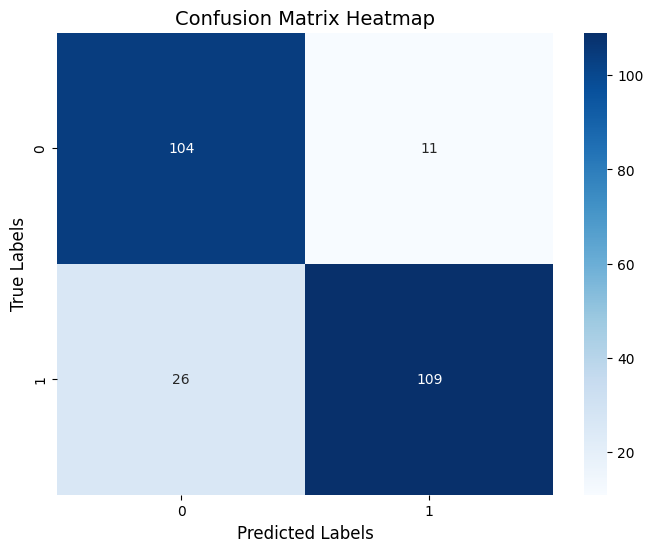

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels', fontsize=12)
plt.ylabel('True Labels', fontsize=12)
plt.title('Confusion Matrix Heatmap', fontsize=14)
plt.show()


### Hyperparameter tuning and Cross validation

In [33]:
model = LogisticRegression()
penalty = ['l2']        # taken only 'l2' because few of the solver doesn't support other regularization
c_values = [100,10,1,0.1,0.01]
solver = ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga']


In [34]:
params = dict(penalty=penalty, C=c_values, solver=solver)

In [35]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold
cv = StratifiedKFold(n_splits=5)
grid = GridSearchCV(estimator=model, param_grid=params,scoring='accuracy',cv= cv, n_jobs=-1)

In [36]:
grid.fit(X_train,y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [100, 10, 1, 0.1, 0.01], 'penalty': ['l2'],
                         'solver': ['lbfgs', 'liblinear', 'newton-cg',
                                    'newton-cholesky', 'sag', 'saga']},
             scoring='accuracy')

In [41]:
y_pred = grid.predict(X_test)
score = accuracy_score(y_test,y_pred)
score

0.852

In [37]:
grid.best_params_

{'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}

In [38]:
grid.best_score_

0.8746666666666666

### Randomized SearchCV

In [42]:
from sklearn.model_selection import RandomizedSearchCV
random = RandomizedSearchCV(estimator=model, param_distributions=params,cv=5,scoring='accuracy')
random.fit(X_train,y_train)

RandomizedSearchCV(cv=5, estimator=LogisticRegression(),
                   param_distributions={'C': [100, 10, 1, 0.1, 0.01],
                                        'penalty': ['l2'],
                                        'solver': ['lbfgs', 'liblinear',
                                                   'newton-cg',
                                                   'newton-cholesky', 'sag',
                                                   'saga']},
                   scoring='accuracy')

In [44]:
y_pred = random.predict(X_test)
score = accuracy_score(y_test,y_pred)
score

0.848

In [43]:
random.best_params_

{'solver': 'liblinear', 'penalty': 'l2', 'C': 0.1}